### This jupyter notebook contains contents of the lesson "EDA - 1 : Data Cleaning"

**Author : Umidjon Sattorov. Machine Learning engineer**

EDA (Exploratory Data Analysis) is the process of exploring data sets to summarize their key characteristics, often using visual methods. It helps to identify patterns, anomalies, relationships, and distributions in the data.

Goals:
* Understand the structure of the data.
* Detect outliers, missing values, and inconsistencies.
* Explore relationships between variables.
* Prepare data for further analysis or modeling.

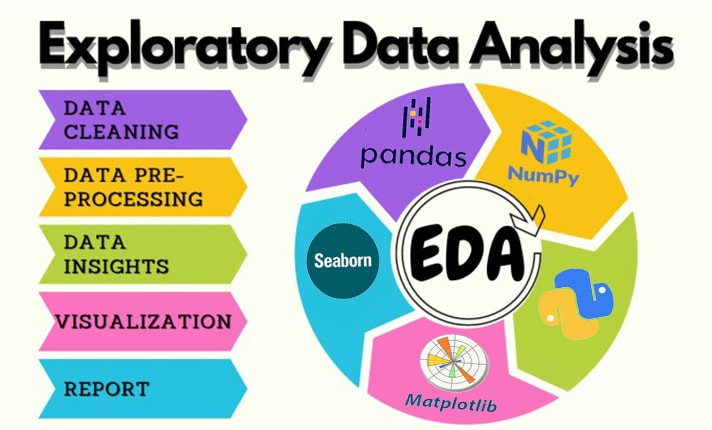

**Data Cleaning**

Data cleaning is a critical step in EDA to ensure data quality.

1.  Duplicates
Issue: Duplicate rows (e.g., the same entry for "Женя Иванов" appearing twice).

Solution: Identify and remove duplicates to avoid skewing analysis.

2. Missing Values
Issue: Empty or "NaN" values (e.g., missing "Рост" (Height) for one entry).

Solution:

Fill missing values (e.g., with mean/median or a placeholder like "Unknown").

Or remove rows/columns with excessive missing data.

3. Data Types
Issue: Incorrect data types (e.g., age written as a string "20" instead of an integer 20).

Solution: Convert data to the correct type (e.g., strings to numbers, dates to datetime format).

4. Outliers
Issue: Unusual values that deviate significantly (e.g., age 125 in the "Возраст" (Age) column).

Solution:

Investigate if outliers are errors (e.g., typo) or valid extremes.

Remove or transform them if they distort analysis.

5. Inconsistencies
Issue: Typos or inconsistent formatting (e.g., "5MB" instead of "BMW" for the car).

Solution: Standardize entries (e.g., correct "5MB" to "BMW").

### **Working with DUPLICATES**

In [1]:
#Import libraries
import pandas as pd

In [2]:
# Read dataframe
df = pd.read_csv('./dataset/vehicles_dataset.csv')
df.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,type,paint_color,image_url,description,county,state,lat,long,posting_date,price_category
0,7308295377,https://chattanooga.craigslist.org/ctd/d/chatt...,chattanooga,https://chattanooga.craigslist.org,54990,2020.0,ram,2500 crew cab big horn,good,NaN,...,pickup,silver,https://images.craigslist.org/00N0N_1xMPvfxRAI...,Carvana is the safer way to buy a car During t...,NaN,tn,35.060000,-85.250000,2021-04-17T12:30:50-0400,high
1,7316380095,https://newjersey.craigslist.org/ctd/d/carlsta...,north jersey,https://newjersey.craigslist.org,16942,2016.0,ford,explorer 4wd 4dr xlt,NaN,6 cylinders,...,SUV,black,https://images.craigslist.org/00x0x_26jl9F0cnL...,***Call Us for more information at: 201-635-14...,NaN,nj,40.821805,-74.061962,2021-05-03T15:40:21-0400,medium
2,7313733749,https://reno.craigslist.org/ctd/d/atlanta-2017...,reno / tahoe,https://reno.craigslist.org,35590,2017.0,volkswagen,golf r hatchback,good,NaN,...,sedan,NaN,https://images.craigslist.org/00y0y_eeZjWeiSfb...,Carvana is the safer way to buy a car During t...,NaN,ca,33.779214,-84.411811,2021-04-28T03:52:20-0700,high
3,7308210929,https://fayetteville.craigslist.org/ctd/d/rale...,fayetteville,https://fayetteville.craigslist.org,14500,2013.0,toyota,rav4,NaN,NaN,...,wagon,white,https://images.craigslist.org/00606_iGe5iXidib...,2013 Toyota RAV4 XLE 4dr SUV Offered by: R...,NaN,nc,35.715954,-78.655304,2021-04-17T10:08:57-0400,medium
4,7316474668,https://newyork.craigslist.org/lgi/cto/d/baldw...,new york city,https://newyork.craigslist.org,21800,2021.0,nissan,altima,new,4 cylinders,...,NaN,NaN,https://images.craigslist.org/00V0V_3pSOiPZ3Sd...,2021 Nissan Altima Sv with Only 8 K Miles Titl...,NaN,ny,40.654800,-73.609700,2021-05-03T18:32:06-0400,medium


In [3]:
df.shape

(10050, 27)

In [27]:
df.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long',
       'posting_date', 'price_category'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10050 entries, 0 to 10049
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10050 non-null  int64  
 1   url             10050 non-null  object 
 2   region          10050 non-null  object 
 3   region_url      10050 non-null  object 
 4   price           10050 non-null  int64  
 5   year            10014 non-null  float64
 6   manufacturer    9665 non-null   object 
 7   model           9921 non-null   object 
 8   condition       6268 non-null   object 
 9   cylinders       5953 non-null   object 
 10  fuel            9987 non-null   object 
 11  odometer        10007 non-null  float64
 12  title_status    9884 non-null   object 
 13  transmission    10005 non-null  object 
 14  VIN             6086 non-null   object 
 15  drive           7026 non-null   object 
 16  size            2825 non-null   object 
 17  type            7845 non-null  

In [4]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
10045    False
10046    False
10047    False
10048    False
10049    False
Length: 10050, dtype: bool

In [6]:
df[df.duplicated()]

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,type,paint_color,image_url,description,county,state,lat,long,posting_date,price_category
1326,7312641615,https://pueblo.craigslist.org/cto/d/pueblo-196...,pueblo,https://pueblo.craigslist.org,6500,1969.0,chevrolet,c10,good,8 cylinders,...,NaN,red,https://images.craigslist.org/00f0f_kmR1TNWM4O...,"1969 C10 runs and drives clean body, needs inn...",NaN,co,38.032300,-104.716000,2021-04-25T20:15:43-0600,low
2159,7312437164,https://yakima.craigslist.org/ctd/d/parker-201...,yakima,https://yakima.craigslist.org,19995,2015.0,subaru,xv crosstrek,NaN,4 cylinders,...,SUV,white,https://images.craigslist.org/01414_cBd43F8IeC...,2015 Subaru XV Crosstrek 2.0i Limited AWD 4dr ...,NaN,wa,46.553190,-120.475680,2021-04-25T11:30:27-0700,medium
2398,7316719393,https://miami.craigslist.org/mdc/ctd/d/miami-2...,south florida,https://miami.craigslist.org,25590,2018.0,volkswagen,golf gti s hatchback,good,NaN,...,sedan,blue,https://images.craigslist.org/00y0y_7qosBCrp0z...,Carvana is the safer way to buy a car During t...,NaN,fl,25.770000,-80.200000,2021-05-04T11:01:11-0400,high
3067,7307971804,https://redding.craigslist.org/ctd/d/sacrament...,redding,https://redding.craigslist.org,8800,2008.0,honda,accord,excellent,NaN,...,sedan,silver,https://images.craigslist.org/00S0S_kT52djO80H...,2008 *** Honda Accord EX L w/Navi 4dr Sedan 5A...,NaN,ca,38.608824,-121.400837,2021-04-16T15:01:16-0700,low
3236,7307083381,https://westernmass.craigslist.org/ctd/d/sprin...,western massachusetts,https://westernmass.craigslist.org,21990,2017.0,gmc,acadia sle-1 sport utility,good,NaN,...,SUV,white,https://images.craigslist.org/00N0N_1xMPvfxRAI...,Carvana is the safer way to buy a car During t...,NaN,ma,42.110000,-72.530000,2021-04-15T06:10:54-0400,medium
3458,7316793777,https://desmoines.craigslist.org/ctd/d/martens...,des moines,https://desmoines.craigslist.org,6700,2015.0,ford,fusion se,good,4 cylinders,...,NaN,NaN,https://images.craigslist.org/00S0S_3wmNGwLyaE...,"2015 Ford Fusion SE, 2.5 4 cyl. automatic, air...",NaN,ia,41.373000,-93.735800,2021-05-04T11:59:42-0500,low
3547,7313511076,https://athensohio.craigslist.org/ctd/d/athens...,athens,https://athensohio.craigslist.org,23590,2012.0,ford,f150 supercrew cab xlt,good,8 cylinders,...,pickup,white,https://images.craigslist.org/00J0J_4mfUGXkpYW...,Carvana is the safer way to buy a car During t...,NaN,oh,39.320000,-82.090000,2021-04-27T16:10:50-0400,high
3635,7314807085,https://oklahomacity.craigslist.org/ctd/d/norm...,oklahoma city,https://oklahomacity.craigslist.org,35988,2018.0,chevrolet,traverse premier,like new,NaN,...,NaN,NaN,https://images.craigslist.org/00i0i_4adOkOM7Vm...,THIS 2018 CHEVROLET TRAVERSE WAS JUST TRADED I...,NaN,ok,35.199000,-97.484100,2021-04-30T10:02:34-0500,high
3726,7311813732,https://youngstown.craigslist.org/ctd/d/struth...,youngstown,https://youngstown.craigslist.org,3000,2006.0,pontiac,grand prix,NaN,NaN,...,NaN,NaN,https://images.craigslist.org/00W0W_aE2NBfU8gr...,2007 PONTIAC GRAND PRIX. GOOD CONDITION IN & O...,NaN,oh,41.023719,-80.594793,2021-04-24T09:42:34-0400,low
3756,7308232496,https://raleigh.craigslist.org/ctd/d/raleigh-2...,raleigh / durham / CH,https://raleigh.craigslist.org,28990,2018.0,gmc,acadia sle-2 sport utility,good,6 cylinders,...,SUV,NaN,https://images.craigslist.org/00I0I_luAr8SgpD6...,Carvana is the safer way to buy a car During t...,NaN,nc,35.820000,-78.650000,2021-04-17T10:51:25-0400,high


In [11]:
df[df['id'] == 7312105878]

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,type,paint_color,image_url,description,county,state,lat,long,posting_date,price_category
5655,7312105878,https://yakima.craigslist.org/ctd/d/yakima-200...,yakima,https://yakima.craigslist.org,5995,2004.0,bmw,x3,excellent,6 cylinders,...,NaN,NaN,https://images.craigslist.org/01212_bplcpV8iDo...,2004 BMW X3 Vehicle Information Make: BMW...,NaN,wa,46.556175,-120.475066,2021-04-24T15:08:38-0700,low
10031,7312105878,https://yakima.craigslist.org/ctd/d/yakima-200...,yakima,https://yakima.craigslist.org,5995,2004.0,bmw,x3,excellent,6 cylinders,...,NaN,NaN,https://images.craigslist.org/01212_bplcpV8iDo...,2004 BMW X3 Vehicle Information Make: BMW...,NaN,wa,46.556175,-120.475066,2021-04-24T15:08:38-0700,low


In [3]:
# Removing duplicates from dataset
new_df = df.drop_duplicates()
new_df.shape

(10000, 27)

### **Problem of NAN values**

In [ ]:
# Quick way checking the number of NAN values
df.isna().sum()

id                    0
url                   0
region                0
region_url            0
price                 0
year                 36
manufacturer        385
model               129
condition          3782
cylinders          4097
fuel                 63
odometer             43
title_status        166
transmission         45
VIN                3964
drive              3024
size               7225
type               2205
paint_color        2963
image_url             2
description           2
county            10050
state                 0
lat                  99
long                 99
posting_date          2
price_category        0
dtype: int64

In [ ]:
%pip install missingno

<Axes: >

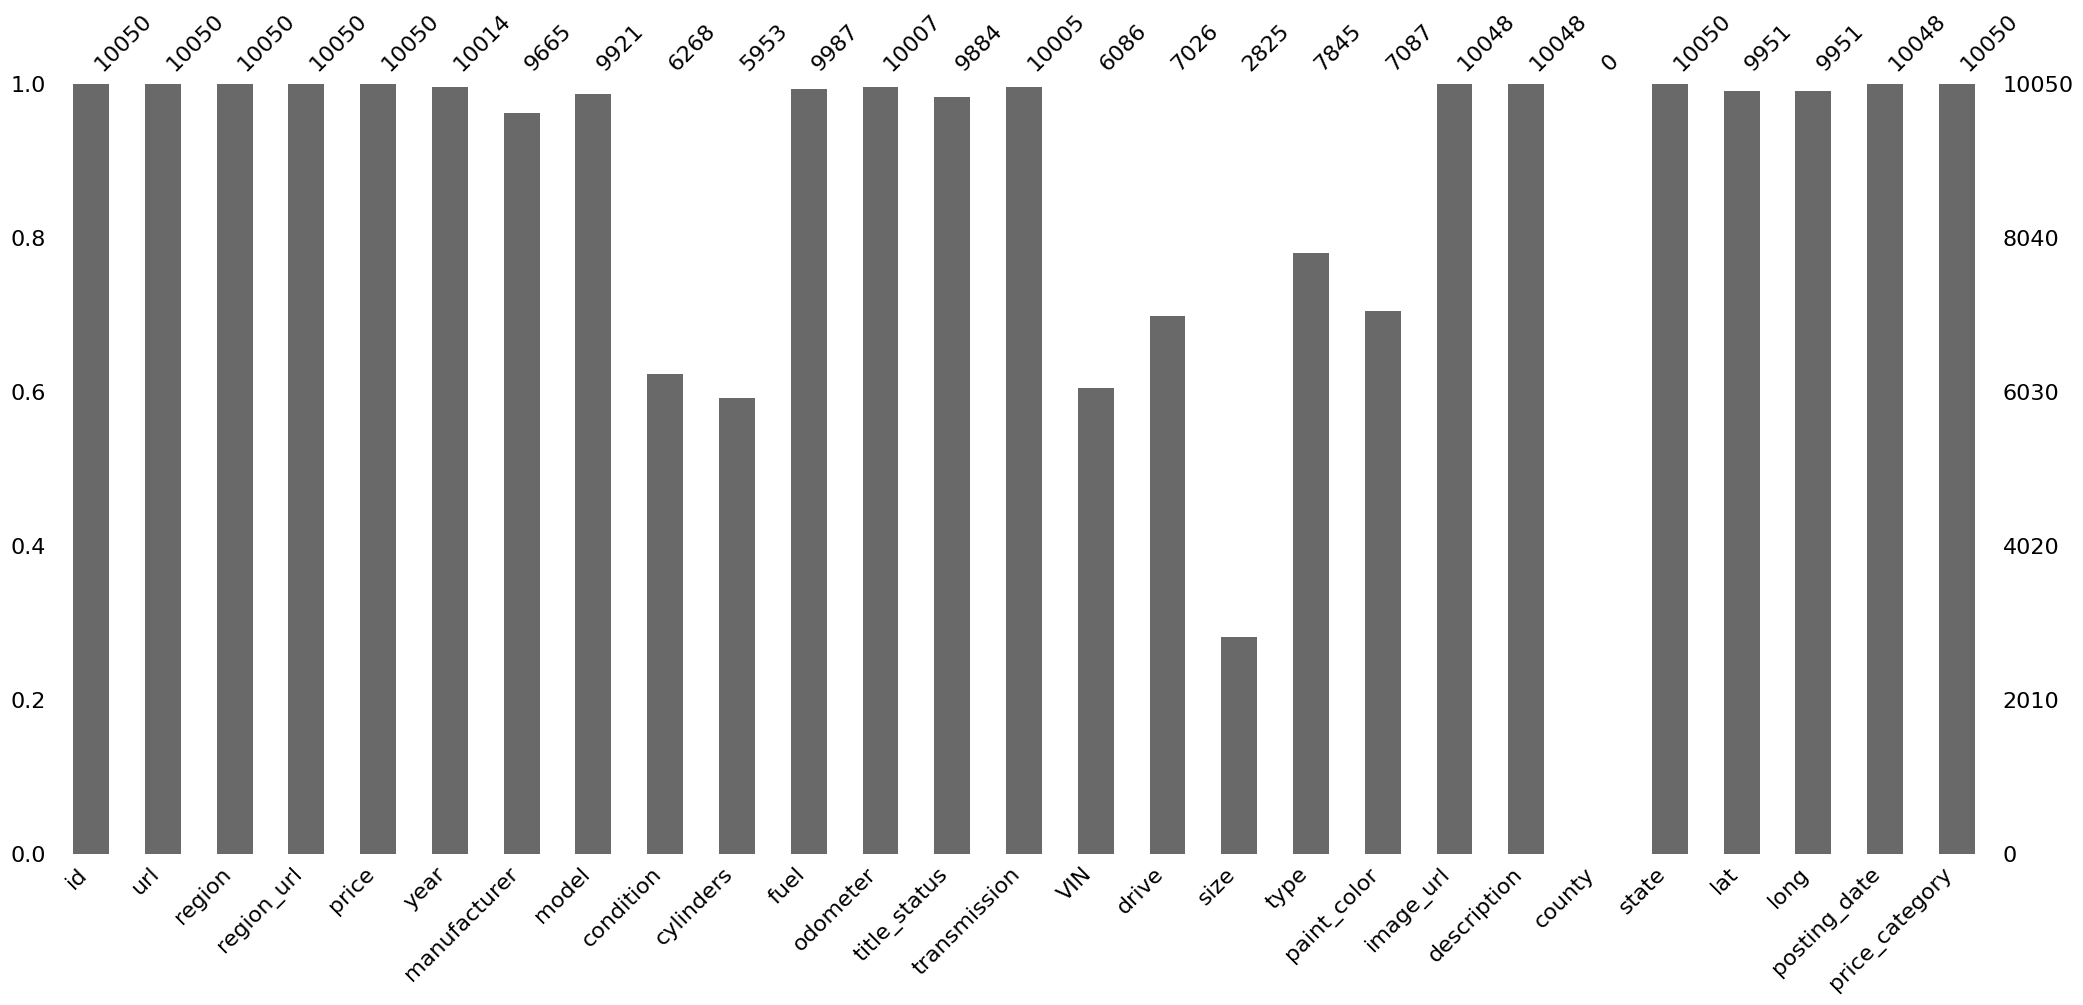

In [15]:
import missingno as msno
msno.bar(df)

<Axes: >

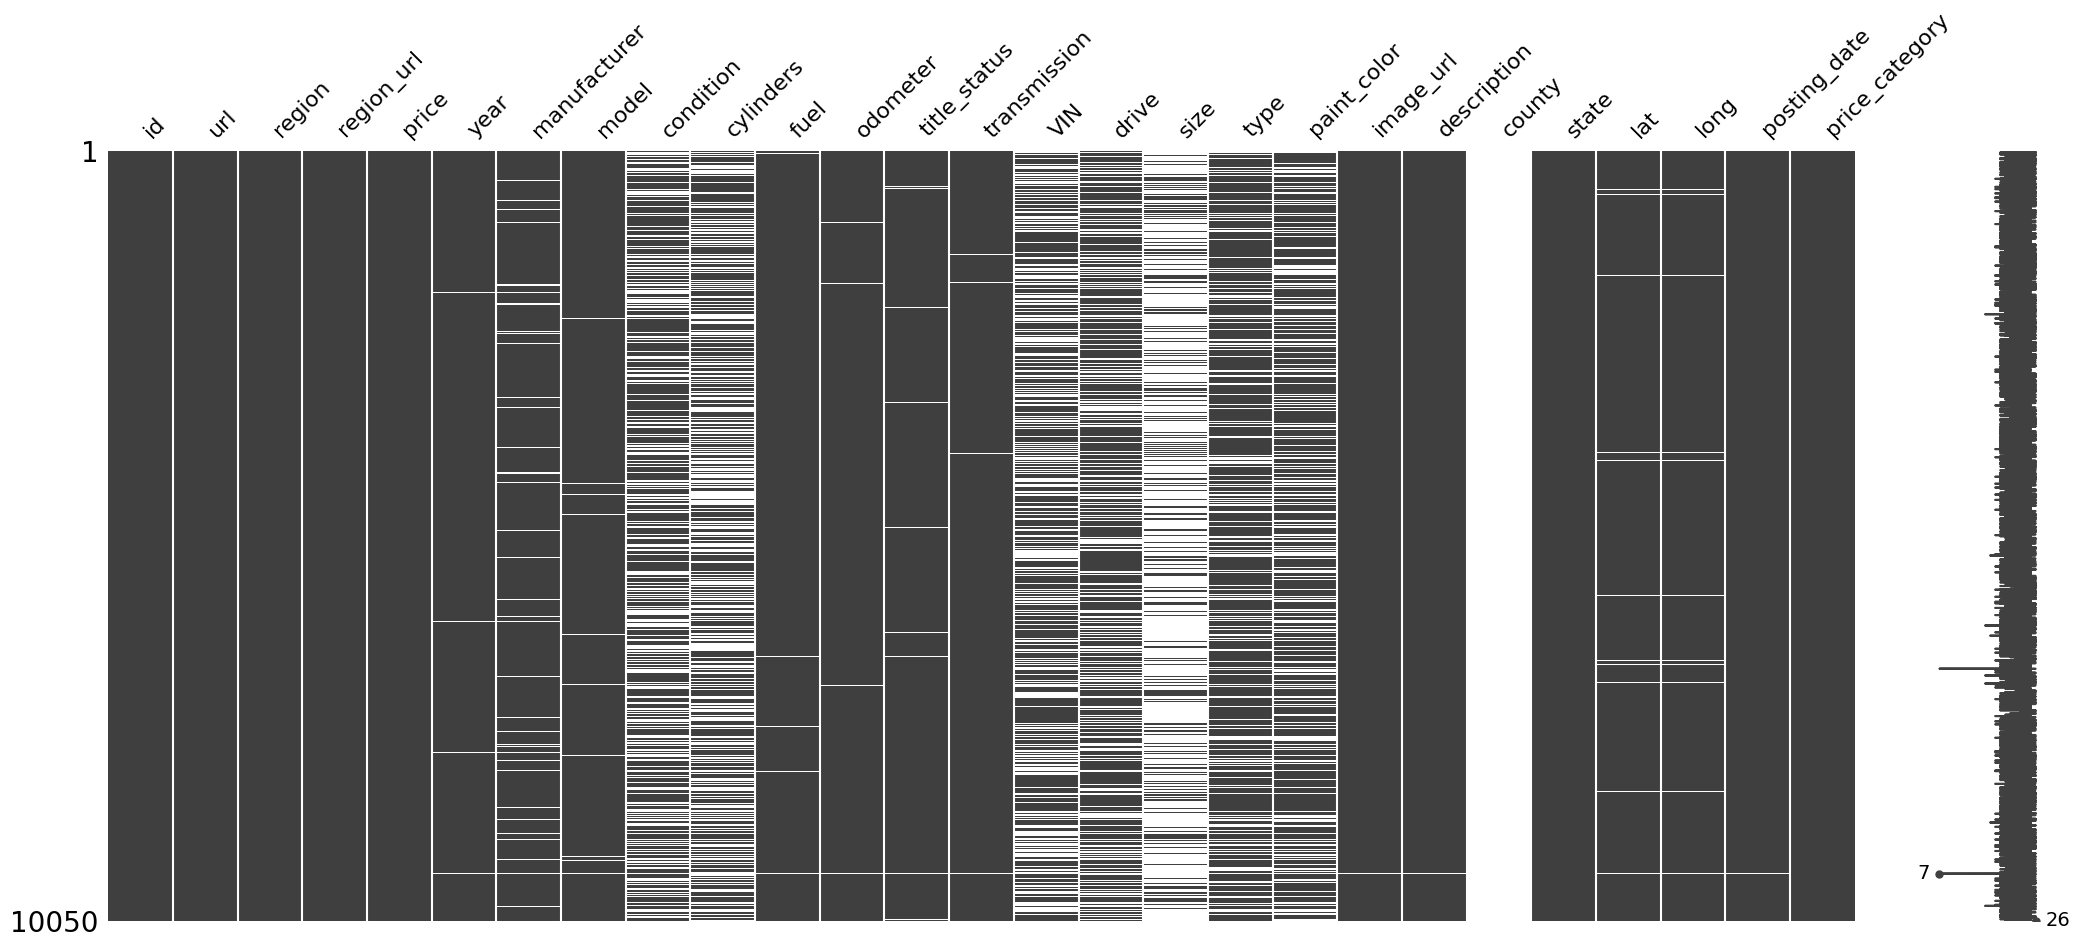

In [16]:
msno.matrix(df)

<Axes: >

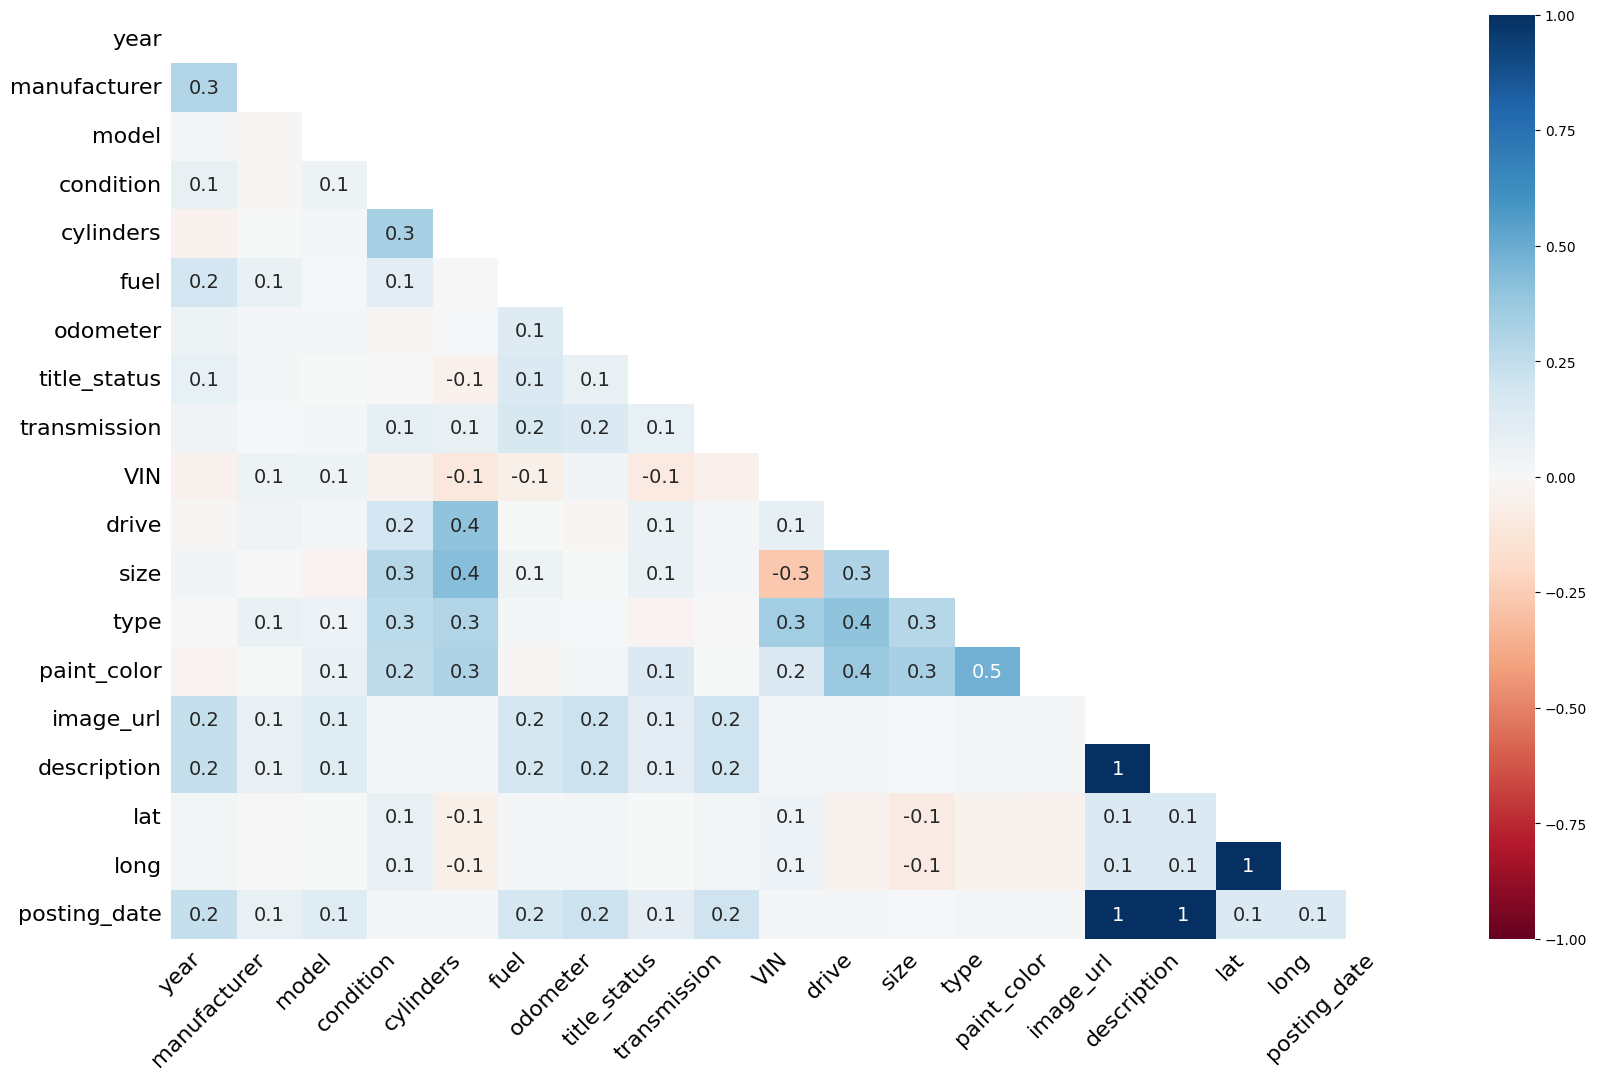

In [17]:
# Correlation heatmap
msno.heatmap(df = df)

In [4]:
# Missing values sorted
missing_values = ((df.isna().sum() / len(df)) * 100).sort_values(ascending = False)
missing_values

county            100.000000
size               71.890547
cylinders          40.766169
VIN                39.442786
condition          37.631841
drive              30.089552
paint_color        29.482587
type               21.940299
manufacturer        3.830846
title_status        1.651741
model               1.283582
long                0.985075
lat                 0.985075
fuel                0.626866
transmission        0.447761
odometer            0.427861
year                0.358209
posting_date        0.019900
image_url           0.019900
description         0.019900
price               0.000000
url                 0.000000
region              0.000000
id                  0.000000
region_url          0.000000
state               0.000000
price_category      0.000000
dtype: float64

In [22]:
df['county'].value_counts(dropna = False)

county
NaN    10050
Name: count, dtype: int64

In [5]:
# Dropping unnecessary column
df_clean = new_df.copy()
df_clean.drop(columns = 'county', inplace = True)
df_clean.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,state,lat,long,posting_date,price_category
0,7308295377,https://chattanooga.craigslist.org/ctd/d/chatt...,chattanooga,https://chattanooga.craigslist.org,54990,2020.0,ram,2500 crew cab big horn,good,NaN,...,NaN,pickup,silver,https://images.craigslist.org/00N0N_1xMPvfxRAI...,Carvana is the safer way to buy a car During t...,tn,35.060000,-85.250000,2021-04-17T12:30:50-0400,high
1,7316380095,https://newjersey.craigslist.org/ctd/d/carlsta...,north jersey,https://newjersey.craigslist.org,16942,2016.0,ford,explorer 4wd 4dr xlt,NaN,6 cylinders,...,NaN,SUV,black,https://images.craigslist.org/00x0x_26jl9F0cnL...,***Call Us for more information at: 201-635-14...,nj,40.821805,-74.061962,2021-05-03T15:40:21-0400,medium
2,7313733749,https://reno.craigslist.org/ctd/d/atlanta-2017...,reno / tahoe,https://reno.craigslist.org,35590,2017.0,volkswagen,golf r hatchback,good,NaN,...,NaN,sedan,NaN,https://images.craigslist.org/00y0y_eeZjWeiSfb...,Carvana is the safer way to buy a car During t...,ca,33.779214,-84.411811,2021-04-28T03:52:20-0700,high
3,7308210929,https://fayetteville.craigslist.org/ctd/d/rale...,fayetteville,https://fayetteville.craigslist.org,14500,2013.0,toyota,rav4,NaN,NaN,...,NaN,wagon,white,https://images.craigslist.org/00606_iGe5iXidib...,2013 Toyota RAV4 XLE 4dr SUV Offered by: R...,nc,35.715954,-78.655304,2021-04-17T10:08:57-0400,medium
4,7316474668,https://newyork.craigslist.org/lgi/cto/d/baldw...,new york city,https://newyork.craigslist.org,21800,2021.0,nissan,altima,new,4 cylinders,...,NaN,NaN,NaN,https://images.craigslist.org/00V0V_3pSOiPZ3Sd...,2021 Nissan Altima Sv with Only 8 K Miles Titl...,ny,40.654800,-73.609700,2021-05-03T18:32:06-0400,medium


In [6]:
def print_useful_rows(df) :
    print(f"The number of useful features : {len(df.dropna())}")
    print(f"In percent : {round(len(df.dropna()) / len(df) * 100, 2)}")

print_useful_rows(df = df_clean)

The number of useful features : 823
In percent : 8.23


Because only 8 percent of the dataset usable, we cannot delete the NAN values from the dataset directly. That's why we have to keep pushing the processing of the data more. We can set new rule like, removing columns which have more than 20 % of NAN values.(This can differ based on the task, for example we cannot remove the column of color of the car when classfying them based on the price).

In [7]:
df_clean = df_clean.drop(
    columns=['VIN', 'condition', 'cylinders', 'size', 'drive', 'paint_color', 'type']
)
print_useful_rows(df_clean)

The number of useful features : 9134
In percent : 91.34


**Working with other columns**

In [9]:
df_clean['manufacturer'].value_counts(dropna = False)

manufacturer
ford               1638
chevrolet          1293
toyota              779
jeep                490
honda               466
nissan              454
ram                 411
NaN                 382
gmc                 358
bmw                 330
dodge               325
volkswagen          251
mercedes-benz       239
hyundai             225
subaru              210
kia                 200
audi                200
lexus               184
cadillac            183
chrysler            161
acura               150
buick               145
mazda               142
infiniti            117
lincoln             113
mitsubishi           82
mini                 72
volvo                67
pontiac              61
rover                59
jaguar               45
porsche              37
mercury              32
tesla                27
saturn               25
fiat                 23
alfa-romeo           14
ferrari               4
harley-davidson       4
datsun                2
Name: count, dtype: int64

In [10]:
df[df['manufacturer'].isna()]

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,type,paint_color,image_url,description,county,state,lat,long,posting_date,price_category
21,7312327909,https://madison.craigslist.org/cto/d/madison-1...,madison,https://madison.craigslist.org,89995,1970.0,NaN,oldsmobile 442,excellent,8 cylinders,...,convertible,white,https://images.craigslist.org/00S0S_agk7Nol4CO...,1970 Oldsmobile 442 Convertible 442 Indy Pace ...,NaN,wi,43.098400,-89.273400,2021-04-25T10:10:43-0500,high
66,7310077530,https://hudsonvalley.craigslist.org/cto/d/bloo...,hudson valley,https://hudsonvalley.craigslist.org,5500,1990.0,NaN,Diahatsu,good,3 cylinders,...,NaN,NaN,https://images.craigslist.org/00T0T_a4VRbx40ea...,1991 Daihatsu hijet 5 speed extended cab....im...,NaN,ny,41.564400,-74.430400,2021-04-20T18:30:18-0400,low
182,7315478090,https://sanantonio.craigslist.org/ctd/d/san-an...,san antonio,https://sanantonio.craigslist.org,15990,2016.0,NaN,Scion iM Hatchback 4D,good,NaN,...,hatchback,green,https://images.craigslist.org/00p0p_cEikZTPxSe...,Carvana is the safer way to buy a car During t...,NaN,tx,29.450000,-98.500000,2021-05-01T15:11:11-0500,medium
201,7316027370,https://monterey.craigslist.org/cto/d/salinas-...,monterey bay,https://monterey.craigslist.org,2500,2005.0,NaN,Voltswagon Beetle,fair,4 cylinders,...,convertible,black,https://images.craigslist.org/00A0A_7UAsZkjlwp...,"New Brakes, new serpentine belt, new catalytic...",NaN,ca,36.667700,-121.659600,2021-05-02T18:15:46-0700,low
217,7314009784,https://nashville.craigslist.org/ctd/d/greenbr...,nashville,https://nashville.craigslist.org,8000,2007.0,NaN,THOMAS SCHOOL BUS,good,6 cylinders,...,bus,yellow,https://images.craigslist.org/00n0n_iyUWRaR9Xr...,5.9 CUMMINS DIESEL; 28 Passenger with 2 Rear A...,NaN,tn,36.422900,-86.791400,2021-04-28T15:08:19-0500,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9908,7305231805,https://ocala.craigslist.org/ctd/d/ocala-2013-...,ocala,https://ocala.craigslist.org,12590,2013.0,NaN,Scion xD Hatchback 4D,good,NaN,...,hatchback,NaN,https://images.craigslist.org/00000_i5GDX6cWZ9...,Carvana is the safer way to buy a car During t...,NaN,fl,29.180000,-82.130000,2021-04-11T13:41:08-0400,medium
9959,7316310341,https://dallas.craigslist.org/dal/ctd/d/dallas...,dallas / fort worth,https://dallas.craigslist.org,24900,2013.0,NaN,FREIGHTLINER M2 106,NaN,6 cylinders,...,NaN,white,https://images.craigslist.org/00B0B_1yCfXhy5M6...,"2013 *FREIGHTLINER* *M2 106* M2106 - $24,900Ca...",NaN,tx,32.807252,-96.860962,2021-05-03T12:50:32-0500,high
9985,7311150986,https://lansing.craigslist.org/ctd/d/grand-rap...,lansing,https://lansing.craigslist.org,7450,2012.0,NaN,Suzuki Grand Vitara,good,NaN,...,SUV,grey,https://images.craigslist.org/00I0I_jmsrI47r7f...,"2012 Suzuki Grand Vitara Premium 4WD - $7,450 ...",NaN,mi,42.912954,-85.680286,2021-04-22T20:32:05-0400,low
10002,7314033574,https://inlandempire.craigslist.org/ctd/d/scot...,inland empire,https://inlandempire.craigslist.org,54995,NaN,NaN,F-150,NaN,6 cylinders,...,pickup,grey,https://images.craigslist.org/00d0d_92wTNhRT7B...,2020 *Ford* *F-150* 180 MILES. LIFTED FORD F15...,NaN,ca,33.458277,-111.925970,2021-04-28T13:51:27-0700,high


In [12]:
df_clean[df_clean['manufacturer'].isna()][['model', 'description']]

,model,description
21,oldsmobile 442,1970 Oldsmobile 442 Convertible 442 Indy Pace ...
66,Diahatsu,1991 Daihatsu hijet 5 speed extended cab....im...
182,Scion iM Hatchback 4D,Carvana is the safer way to buy a car During t...
201,Voltswagon Beetle,"New Brakes, new serpentine belt, new catalytic..."
217,THOMAS SCHOOL BUS,5.9 CUMMINS DIESEL; 28 Passenger with 2 Rear A...
...,...,...
9908,Scion xD Hatchback 4D,Carvana is the safer way to buy a car During t...
9959,FREIGHTLINER M2 106,"2013 *FREIGHTLINER* *M2 106* M2106 - $24,900Ca..."
9985,Suzuki Grand Vitara,"2012 Suzuki Grand Vitara Premium 4WD - $7,450 ..."
10002,F-150,2020 *Ford* *F-150* 180 MILES. LIFTED FORD F15...


Because extraction of the manufacturer from the column description require advanced knowledge in the field of NLP, this time I want to just leave with the option of replacing all missing values with 'other'

In [8]:
# fillna technique
df_clean = df_clean.fillna({'manufacturer' : 'other'})
df_clean['manufacturer'].isna().sum()

np.int64(0)

___

In [12]:
# Other techniques of filling using fillna function
df_vehicles = pd.read_csv('./dataset/automobile_data_nan.csv')
df_vehicles.head()

,index,company,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage,price
0,0,alfa-romero,convertible,88.6,168.8,dohc,four,NaN,21.0,13495.0
1,1,alfa-romero,convertible,NaN,168.8,dohc,four,111.0,21.0,16500.0
2,2,alfa-romero,hatchback,94.5,171.2,ohcv,six,154.0,NaN,16500.0
3,3,audi,sedan,99.8,176.6,ohc,four,102.0,24.0,13950.0
4,4,audi,sedan,99.4,176.6,ohc,five,NaN,NaN,17450.0


In [17]:
df_vehicles.shape

(61, 10)

In [18]:
df_vehicles.isna().sum().sort_values(ascending = False)

horsepower          16
wheel-base          15
average-mileage     15
length              13
engine-type         12
price                3
company              0
index                0
body-style           0
num-of-cylinders     0
dtype: int64

In [19]:
# Closely matched vehicles
df_vehicles['company'].value_counts()

company
toyota           7
bmw              6
mazda            5
nissan           5
mercedes-benz    4
audi             4
volkswagen       4
mitsubishi       4
chevrolet        3
jaguar           3
isuzu            3
honda            3
porsche          3
alfa-romero      3
dodge            2
volvo            2
Name: count, dtype: int64

In [20]:
df_vehicles[df_vehicles['company'] == 'toyota']

,index,company,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage,price
48,66,toyota,hatchback,NaN,158.7,ohc,four,62.0,35.0,5348.0
49,67,toyota,hatchback,95.7,158.7,NaN,four,NaN,31.0,6338.0
50,68,toyota,hatchback,NaN,158.7,ohc,four,62.0,31.0,6488.0
51,69,toyota,wagon,95.7,169.7,ohc,four,62.0,31.0,6918.0
52,70,toyota,wagon,95.7,NaN,NaN,four,62.0,27.0,7898.0
53,71,toyota,wagon,95.7,169.7,ohc,four,NaN,27.0,8778.0
54,79,toyota,wagon,104.5,187.8,dohc,six,156.0,NaN,15750.0


In [ ]:
df_vehicles[df_vehicles['company'] == 'toyota'].fillna(method = 'ffill') #bfill

C:\Users\user\AppData\Local\Temp\ipykernel_12712\605039887.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_vehicles[df_vehicles['company'] == 'toyota'].fillna(method = 'ffill')


,index,company,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage,price
48,66,toyota,hatchback,NaN,158.7,ohc,four,62.0,35.0,5348.0
49,67,toyota,hatchback,95.7,158.7,ohc,four,62.0,31.0,6338.0
50,68,toyota,hatchback,95.7,158.7,ohc,four,62.0,31.0,6488.0
51,69,toyota,wagon,95.7,169.7,ohc,four,62.0,31.0,6918.0
52,70,toyota,wagon,95.7,169.7,ohc,four,62.0,27.0,7898.0
53,71,toyota,wagon,95.7,169.7,ohc,four,62.0,27.0,8778.0
54,79,toyota,wagon,104.5,187.8,dohc,six,156.0,27.0,15750.0


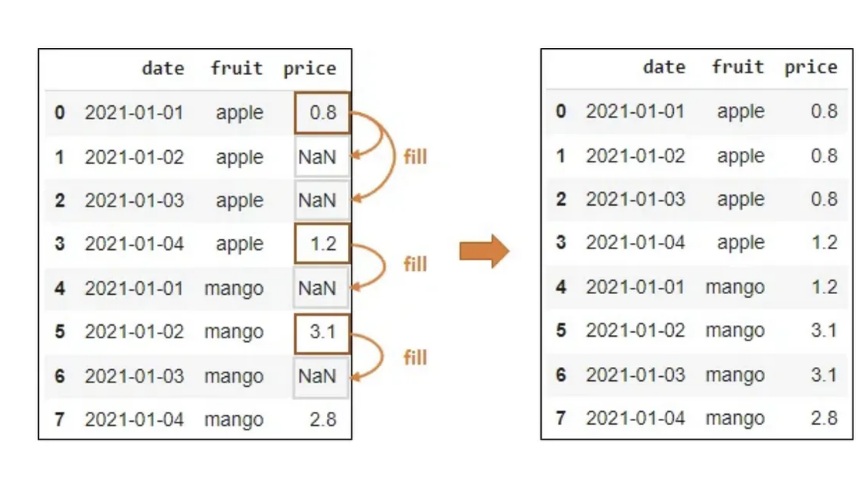

In [13]:
df_vehicles[df_vehicles['price'].isna()]

,index,company,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage,price
22,31,isuzu,sedan,94.5,155.9,ohc,four,70.0,NaN,NaN
23,32,isuzu,sedan,94.5,NaN,ohc,four,70.0,38.0,NaN
47,63,porsche,hatchback,98.4,175.7,dohcv,eight,NaN,NaN,NaN


Just have an idea : What if we fill up missing values of price of the cars using mean() function. But for isuzu company, I am going fill up missing values with ffill method.

In [14]:
df_vehicles[df_vehicles['company'] == 'porsche']

,index,company,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage,price
45,61,porsche,hardtop,NaN,NaN,NaN,six,207.0,17.0,34028.0
46,62,porsche,convertible,89.5,168.9,ohcf,six,207.0,17.0,37028.0
47,63,porsche,hatchback,98.4,175.7,dohcv,eight,NaN,NaN,NaN


In [15]:
df_vehicles[df_vehicles['company'] == 'isuzu']

,index,company,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage,price
21,30,isuzu,sedan,NaN,170.7,ohc,four,78.0,24.0,6785.0
22,31,isuzu,sedan,94.5,155.9,ohc,four,70.0,NaN,NaN
23,32,isuzu,sedan,94.5,NaN,ohc,four,70.0,38.0,NaN


In [18]:
df_vehicles[df_vehicles['company'] == 'porsche'] = df_vehicles[df_vehicles['company'] == 'porsche'].fillna(value = df_vehicles[df_vehicles['company'] == 'porsche']['price'].mean())
df_vehicles.isna().sum()

index                0
company              0
body-style           0
wheel-base          14
length              12
engine-type         11
num-of-cylinders     0
horsepower          15
average-mileage     14
price                2
dtype: int64

In [20]:
df_vehicles[df_vehicles['company'] == 'isuzu'] = df_vehicles[df_vehicles['company'] == 'isuzu'].fillna(method = 'ffill')
df_vehicles.isna().sum()

C:\Users\user\AppData\Local\Temp\ipykernel_5268\207215159.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_vehicles[df_vehicles['company'] == 'isuzu'] = df_vehicles[df_vehicles['company'] == 'isuzu'].fillna(method = 'ffill')


index                0
company              0
body-style           0
wheel-base          14
length              11
engine-type         11
num-of-cylinders     0
horsepower          15
average-mileage     13
price                0
dtype: int64

___

Dealing with column odometer :

In [21]:
df_clean[df_clean['odometer'].isna()]

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category
240,7306504389,https://bakersfield.craigslist.org/ctd/d/fresn...,bakersfield,https://bakersfield.craigslist.org,29998,2016.0,lexus,nx,gas,NaN,clean,automatic,https://images.craigslist.org/00r0r_7hJfyJGBZb...,2016 *** Lexus NX 200t F Sport SUV *** Read...,ca,36.837679,-119.809638,2021-04-13T19:15:45-0700,high
341,7313513841,https://albuquerque.craigslist.org/ctd/d/albuq...,albuquerque,https://albuquerque.craigslist.org,27495,2011.0,cadillac,cts-v coupe,gas,NaN,clean,automatic,https://images.craigslist.org/00W0W_aQNTz1yato...,2011 *** Cadillac CTS-V Coupe 2dr Cpe Coupe **...,nm,35.087703,-106.579999,2021-04-27T14:15:30-0600,high
400,7315580028,https://fresno.craigslist.org/ctd/d/north-holl...,fresno / madera,https://fresno.craigslist.org,28995,2017.0,chevrolet,silverado 1500,gas,NaN,clean,automatic,https://images.craigslist.org/00U0U_dTBRu7M6xI...,2017 Chevrolet Silverado 1500 2WD Double Cab 1...,ca,34.190040,-118.387533,2021-05-01T17:03:13-0700,high
564,7314899346,https://fresno.craigslist.org/ctd/d/fresno-201...,fresno / madera,https://fresno.craigslist.org,44598,2018.0,mercedes-benz,e-class,gas,NaN,clean,automatic,https://images.craigslist.org/00000_8QIFfftsxf...,Drive it home today. Call (Or Text) us now !!C...,ca,36.837679,-119.809638,2021-04-30T10:33:51-0700,high
933,7313530642,https://bakersfield.craigslist.org/ctd/d/fresn...,bakersfield,https://bakersfield.craigslist.org,33898,2015.0,other,Maserati Ghibli,gas,NaN,clean,automatic,https://images.craigslist.org/00a0a_WtMWXlB7ek...,2015 *** Maserati Ghibli S Q4 Sedan *** Rea...,ca,36.837679,-119.809638,2021-04-27T13:45:52-0700,high
1566,7314651593,https://bend.craigslist.org/ctd/d/gladstone-20...,bend,https://bend.craigslist.org,11985,2006.0,honda,pilot,gas,NaN,clean,automatic,https://images.craigslist.org/01313_dba0iHoXBW...,2006 Honda Pilot EX L w/DVD 4dr SUV 4WD SUV ...,or,45.374861,-122.602289,2021-04-29T19:19:17-0700,medium
1729,7316459394,https://yakima.craigslist.org/ctd/d/yakima-201...,yakima,https://yakima.craigslist.org,6999,2012.0,jeep,liberty,gas,NaN,clean,automatic,https://images.craigslist.org/00J0J_kF1MimeKNG...,2012 *** JEEP LIBERTY SPORT SUV *** Ready T...,wa,46.584837,-120.508958,2021-05-03T15:00:47-0700,low
1854,7310422912,https://yubasutter.craigslist.org/ctd/d/sacram...,yuba-sutter,https://yubasutter.craigslist.org,9988,2015.0,volkswagen,beetle - new tires - leather and heated seats -,gas,NaN,clean,automatic,https://images.craigslist.org/00G0G_5sshuwwxzJ...,Drive it home today. Call (Or Text) us now !!C...,ca,38.589200,-121.405700,2021-04-21T10:31:39-0700,medium
1903,7308735851,https://charlotte.craigslist.org/ctd/d/mount-m...,charlotte,https://charlotte.craigslist.org,12250,2016.0,toyota,scion tc,gas,NaN,clean,manual,https://images.craigslist.org/00t0t_5mwiKHrm7n...,2016 Scion tC Sports Coupe 6-Spd MT Offere...,nc,35.589154,-80.832039,2021-04-18T11:01:47-0400,medium
2130,7302733118,https://harrisburg.craigslist.org/ctd/d/brockp...,harrisburg,https://harrisburg.craigslist.org,14700,2016.0,ford,fusion,NaN,NaN,NaN,NaN,https://images.craigslist.org/00O0O_fkFRDDi4yq...,Car Starz Call Sales at 717-401-4221 2016 Ford...,pa,41.261540,-78.704520,2021-04-06T14:39:29-0400,medium


In [23]:
df['odometer'].value_counts()

odometer
100000.0    51
1.0         42
200000.0    37
140000.0    37
150000.0    37
            ..
114730.0     1
151942.0     1
113573.0     1
150184.0     1
31532.0      1
Name: count, Length: 7006, dtype: int64

In [24]:
df_clean['odometer'] = df_clean['odometer'].fillna(int(df_clean['odometer'].mean()))

In [25]:
df_clean['odometer'].isna().sum()

np.int64(0)

In [26]:
df_clean.to_csv('./dataset/df_clean.csv', index=False)